In [1]:
from program.validation.scripts.simulator import *

In [2]:
%matplotlib inline
plt.rcParams['image.cmap'] = 'gray'
sns.set_style('white')

Settings
--------

In [3]:
# resolution
res_x = 1920 # pixels
res_y = 1440 # pixels

# normalized focal length
f = 0.5 / np.tan(np.deg2rad(10) / 2)

# pixel aspect ratio
pixel_ar = 1

# normalized principal point
ppx = 0.5
ppy = 0.5

gaussian_noise_sigma = 20e-6 # rad

cam = 0

In [4]:
# magnitude parameters

A_pixel = 525 # photonelectrons/s mm
sigma_pixel = 525 # photonelectrons/s mm

sigma_psf = 0.5 # pixel
t_exp = 0.2 # s
aperture = 15 # mm

base_photons = 19100 # photoelectrons per mm² and second of a magnitude 0 G2 star

magnitude_gaussian = 0.01 # mag

In [5]:
# star count

min_true = 3
max_true = 100
min_false = 0
max_false = 10
min_stars = min_true

Base Objects
--------

In [6]:
import os
 
catalog = StarCatalog('{}/program/validation/data/hip_main.dat'.format(
    os.getcwd()))

       Catalog     HIP Proxy        RAhms        DEdms   Vmag  VarFlag r_Vmag  \
0            H       1   NaN  00 00 00.22  +01 05 20.4   9.10      NaN      H   
1            H       2   NaN  00 00 00.91  -19 29 55.8   9.27      NaN      G   
2            H       3   NaN  00 00 01.20  +38 51 33.4   6.61      NaN      G   
3            H       4   NaN  00 00 02.01  -51 53 36.8   8.06      NaN      H   
4            H       5   NaN  00 00 02.39  -40 35 28.4   8.55      NaN      H   
5            H       6   NaN  00 00 04.35  +03 56 47.4  12.31      NaN      G   
6            H       7   NaN  00 00 05.41  +20 02 11.8   9.64      NaN      G   
7            H       8   NaN  00 00 06.55  +25 53 11.3   9.05      3.0      H   
8            H       9   NaN  00 00 08.48  +36 35 09.4   8.59      NaN      H   
9            H      10   NaN  00 00 08.70  -50 52 01.5   8.59      NaN      H   
10           H      11   NaN  00 00 08.95  +46 56 24.0   7.34      NaN      H   
11           H      12   NaN

In [7]:
cameras = [
    RectilinearCamera,
    EquidistantCamera,
    EquisolidAngleCamera,
    StereographicCamera,
    OrthographicCamera,
]

camera = cameras[cam](f, (res_x, res_y), pixel_ar, (ppx, ppy))

In [8]:
detector = StarDetector(
    A_pixel, sigma_pixel, sigma_psf, t_exp, aperture, base_photons)

Scene Creation
------------

In [9]:
num_scenes = 1

In [10]:
inputs = []
outputs = []

for i in range(num_scenes):
    scene = Scene.random(
        catalog, camera, detector, min_true, max_true, 
        min_false, max_false, min_stars, max_tries=1000,
        gaussian_noise_sigma=gaussian_noise_sigma, 
        magnitude_gaussian=magnitude_gaussian)
    
    inputs.append(np.hstack((scene.pos[::, ::-1], scene.magnitudes.reshape(-1, 1))).flatten())
    outputs.append(scene.ids)

[3 0 1 2]
4
[2 9 5 0 7 3 8 6 1 4]
10
[3 0 1 4 2]
5
[]
0


IndexError: arrays used as indices must be of integer (or boolean) type

In [11]:
def write_csv(filename, lines):
    with open(filename, 'w') as f:
        for line in lines:
            f.write(','.join(str(value) for value in line) + '\n')

In [12]:
write_csv('input_sample.csv', inputs)
write_csv('result_sample.csv', outputs)

### Render the last scene

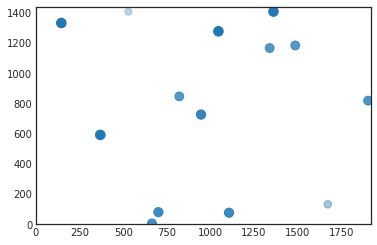

In [13]:
_ = scene.render(False)


